In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent = (session.query(Measurement.date)
               .order_by(Measurement.date.desc())
               .first())
most_recent

('2017-08-23',)

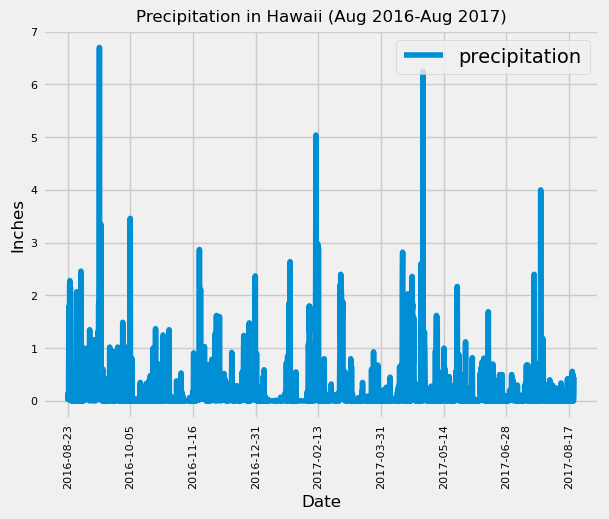

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
twelve_months = dt.date(2017, 8, 23)-dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.
previous_date = dt.date(twelve_months.year, twelve_months.month, twelve_months.day)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.date, Measurement.prcp).filter(
    Measurement.date >= previous_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
scores_df = pd.DataFrame(scores, columns=['date', 'precipitation'])

# Sort the dataframe by date
scores_df.set_index(scores_df['date'], inplace=True)

#View the data as a checkpoint
#scores_df.head()
# Drop null values?
clean_scores_df = scores_df.dropna()
# Use Pandas Plotting with Matplotlib to plot the data
clean_scores_df.plot('date', 'precipitation')

plt.xlabel("Date", size = 12)
plt.ylabel("Inches", size =12)
plt.title("Precipitation in Hawaii (Aug 2016-Aug 2017)", size =12)
plt.legend(["precipitation"],loc='upper right')
plt.xticks(rotation=90, size =8)
plt.yticks(size = 8)
plt.show()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
clean_scores_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
number_of_stations = session.query(Station.id).count()
number_of_stations

9

In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)\
                .order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Answer this question: which station id has the greatest number of observations?
# Station USC00519281

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
    .filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

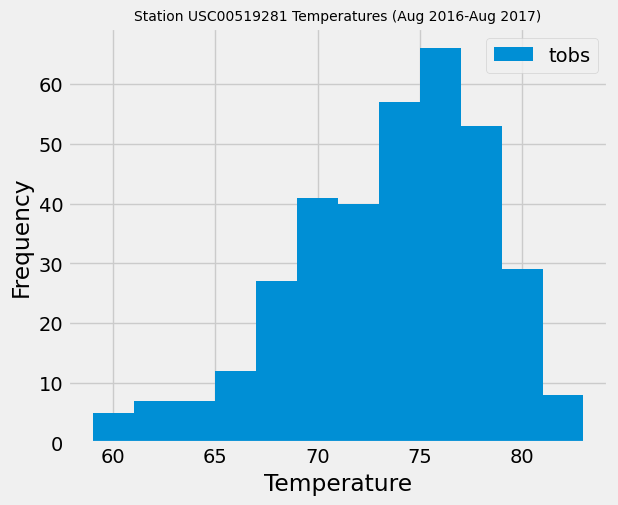

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_data = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281')\
    .filter(Measurement.date >= '2016-08-23').all()

# Plot the data
active_station_temps = pd.DataFrame(active_station_data, columns = ['tobs'])
active_station_temps.plot.hist(bins= 12)
plt.tight_layout()
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Station USC00519281 Temperatures (Aug 2016-Aug 2017)", size =10)

plt.show()

# Close Session

In [27]:
# Close Session
session.close()